#### Executive Summary



###### Insights based on the provided data:



##### Segmentation based on Preferences, Geographic Location, and Purchasing Behavior:

Preferences: Customer preferences can be inferred from the order_id and status columns. For example, canceled or failed   
orders might indicate dissatisfaction or changing preferences.

Geographic Location: The location column provides information about the geographic distribution of customers. This can help 
in segmenting customers based on regions or countries.

Purchasing Behavior: The presence of order_id and status can indicate purchasing behavior. Analyzing successful orders 
versus canceled or failed ones can reveal insights into purchasing patterns.

From the data, 66% of orders were either failed or cancelled. This is an area that the company must look to understand and 
resolve.

Also Saturdays appear to be a prefered day for customers to engage the site. With over 91% of customer activity in the month 
happeneng on Saturdays. The company should look to ensure that the site is fully functional and disruption free on this day

In addition, the top regions with customer orders are in Africa, Asia and Europe. There is room for market capture in other 
continents. Product breakdowns and patterns are illustrated in the analysis below.

##### Enhancing Website Usability and User Experience:

Analyzing the checked_out_at column can provide insights into the user experience during the checkout process. High checkout 
abandonment rates might indicate usability issues.

Understanding how products are frequently added to the cart but not purchased (status is not 'success') can highlight 
potential friction points in the user journey.

From the data  average number of visits to the site is about 4.4 per customer with more cutomers hitting around 6 visits 
in the month and the highest number of visits for an individual customer was 10.

In addition the event data analysis shows customer activity breakdown as follows 
add_to_cart         44.243519
visit               30.447394
remove_from_cart    22.188332
checkout            3.120754
This indicates a very low check out rate.

##### Optimizing Product Offerings and Marketing Strategies:

Analyzing the item_id and quantity columns can reveal popular products and their purchase quantities. This information can   
help in optimizing product offerings and ensuring sufficient stock of popular items.

Segmenting customers based on geographic location can aid in tailoring marketing strategies to specific regions. For   
example, offering localized promotions or advertisements.

From the data, there are no significant variations in the total number of products ordered (successful or unsuccessful) 
across regions. Product breakdowns and patterns are illustrated in the analysis below.

##### Location Analysis:

Customer location data is available in the location column. Analyzing this data can provide insights into the geographic 
distribution of customers.

The influence of location on purchasing behavior can be inferred by comparing sales data across different regions. For   
example, customers from certain regions might prefer specific products or have different purchasing habits.

Product breakdowns and patterns are illustrated in the analysis below.

##### Overall Purchase Behavior:

Overall purchase behavior can be assessed by analyzing the distribution of successful orders (status is 'success') versus 
canceled or failed orders.

Understanding the frequency and timing of purchases can provide insights into customer engagement and loyalty.

##### Data Capture:

It is important for the company to maintain complete and accurate data to enhance data analysis and subsequent effective formulation of in sights.

From the orders data captured, around 50% of all orders(success, cancelled and failed) and 16% of successful orders only, were not captured in the line_items data set. This effectively means the amount of actual products sold or viewed as well as amount generated is not fully analysed.

##### Informing Marketing Strategies and Personalized Recommendations:

Insights from customer segmentation based on preferences, location, and purchasing behavior can inform targeted marketing 
campaigns. For example, sending personalized recommendations based on past purchase history or geographic location.

Analyzing customer feedback from canceled or failed orders can help identify areas for improvement and refine marketing    
strategies to enhance customer satisfaction and retention.

# Data Merging, Cleaning and Wrangling

#### Load/Read the files

In [133]:
import pandas as pd
import numpy as np
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Read the customers CSV file
customers = pd.read_csv('customers.csv.')

customers.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [135]:
customers.shape

(10000, 4)

In [136]:
unique_customer_count = customers['customer_id'].nunique()
print("Unique customer count:", unique_customer_count)

Unique customer count: 10000


In [137]:
# Read the events CSV file
events = pd.read_csv('events.csv.')
events.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


In [138]:
events.shape

(147208, 4)

In [142]:
# Read the line_items CSV file
line_items = pd.read_csv('line_items.csv.')
line_items.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [143]:
line_items.shape

(31741, 4)

In [144]:
unique_order_count_in_line_items = line_items['order_id'].nunique()
print("Unique order count in line_items:", unique_order_count_in_line_items)

Unique order count in line_items: 4594


In [145]:
# Read the orders CSV file
orders = pd.read_csv('orders.csv.')
orders.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


In [146]:
orders.shape

(9165, 4)

In [183]:
filtered_orders = orders[(orders['status'] == 'success')] 

filtered_orders.shape

(2998, 4)

In [148]:
# Read the CSV file
products = pd.read_csv('products.csv.')
products.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [149]:
products.shape

(15, 3)

#### Merge the files

In [150]:
# First merge

merged_df = pd.merge(customers, orders, on='customer_id', how='outer')

In [151]:
merged_df.isna().sum()

customer_id         0
device_id           0
location            0
currency            0
order_id          835
status            835
checked_out_at    835
dtype: int64

In [152]:
merged_df.shape

(10000, 7)

In [154]:
# Second merge

merged_df_2 = pd.merge(merged_df, line_items, on='order_id', how='outer')

In [155]:
merged_df_2.isna().sum()

customer_id          0
device_id            0
location             0
currency             0
order_id           835
status             835
checked_out_at     835
line_item_id      5406
item_id           5406
quantity          5406
dtype: int64

In [156]:
merged_df_2.shape

(37147, 10)

In [157]:
# Third merge

merged_df_3=pd.merge(merged_df_2, products, left_on='item_id',
                  right_on='id', how='outer')

In [158]:
merged_df_3.isna().sum()

customer_id          0
device_id            0
location             0
currency             0
order_id           835
status             835
checked_out_at     835
line_item_id      5406
item_id           5406
quantity          5406
id                5406
name              5406
price             5406
dtype: int64

In [159]:
merged_df_3.shape


(37147, 13)

In [161]:
merged_df_3.head(5)

,customer_id,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,NaN,NaN,NaN,NaN,NaN,NaN
2,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP,170a66c8-6b39-468c-935c-445eb6be9fdf,cancelled,2024-03-30 04:09:10.412870,NaN,NaN,NaN,NaN,NaN,NaN
3,06ac6a15-1a39-417a-bcbd-bfd8a5044b49,25460125-c648-42d4-a516-79e485b892cb,Moldova,USD,b2c190e8-954f-4290-a078-fbba9090f92d,cancelled,2024-03-30 04:06:10.415021,NaN,NaN,NaN,NaN,NaN,NaN
4,8f11a63f-4f4d-42be-8330-d736c674e96b,bd013902-0329-442e-966b-e366ab85f5d2,Micronesia,USD,4eb8c025-82d6-443e-94bf-c70eb91cff4d,failed,2024-03-30 04:06:10.421398,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
merged_df_3.isna().sum()

customer_id          0
device_id            0
location             0
currency             0
order_id           835
status             835
checked_out_at     835
line_item_id      5406
item_id           5406
quantity          5406
id                5406
name              5406
price             5406
dtype: int64

#### Features Engineering 

In [164]:
# Create a mapping dictionary for countries and their corresponding continents
country_to_continent = {
'Saint Helena' : 'Africa',
'Djibouti' : 'Africa',
'Mali' : 'Africa',
'Equatorial Guinea' : 'Africa',
'Sudan' : 'Africa',
'Libyan Arab Jamahiriya' : 'Africa',
'Senegal' : 'Africa',
'Tanzania' : 'Africa',
'Chad' : 'Africa',
'Mauritania' : 'Africa',
'Malawi' : 'Africa',
'Mozambique' : 'Africa',
'Egypt' : 'Africa',
'Angola' : 'Africa',
'Benin' : 'Africa',
'Sierra Leone' : 'Africa',
'Mayotte' : 'Africa',
'Swaziland' : 'Africa',
'Ethiopia' : 'Africa',
'Zimbabwe' : 'Africa',
'Congo' : 'Africa',
'Algeria' : 'Africa',
'Eritrea' : 'Africa',
'Liberia' : 'Africa',
"Cote d'Ivoire" : 'Africa',
'Rwanda' : 'Africa',
'Western Sahara' : 'Africa',
'Mauritius' : 'Africa',
'Cape Verde' : 'Africa',
'Seychelles' : 'Africa',
'Morocco' : 'Africa',
'Gambia' : 'Africa',
'Tunisia' : 'Africa',
'Nigeria' : 'Africa',
'Burundi' : 'Africa',
'Kenya' : 'Africa',
'Burkina Faso' : 'Africa',
'Central African Republic' : 'Africa',
'Uganda' : 'Africa',
'Somalia' : 'Africa',
'Ghana' : 'Africa',
'Comoros' : 'Africa',
'Madagascar' : 'Africa',
'Sao Tome and Principe' : 'Africa',
'Lesotho' : 'Africa',
'Niger' : 'Africa',
'South Africa' : 'Africa',
'Gabon' : 'Africa',
'Reunion' : 'Africa',
'Guinea' : 'Africa',
'Cameroon' : 'Africa',
'Togo' : 'Africa',
'Zambia' : 'Africa',
'Botswana' : 'Africa',
'Namibia' : 'Africa',
'Guinea-Bissau' : 'Africa',
'South Georgia and the South Sandwich Islands' : 'Antarctica',
'Bouvet Island (Bouvetoya)' : 'Antarctica',
'Antarctica (the territory South of 60 deg S)' : 'Antarctica',
'Heard Island and McDonald Islands' : 'Antarctica',
'French Southern Territories' : 'Antarctica',
'Oman' : 'Asia',
'Pakistan' : 'Asia',
'Palestinian Territory' : 'Asia',
'Qatar' : 'Asia',
'Israel' : 'Asia',
'Uzbekistan' : 'Asia',
'India' : 'Asia',
'Philippines' : 'Asia',
'Christmas Island' : 'Asia',
'China' : 'Asia',
'Thailand' : 'Asia',
'Tajikistan' : 'Asia',
'Armenia' : 'Asia',
'United Arab Emirates' : 'Asia',
'Lebanon' : 'Asia',
'Myanmar' : 'Asia',
'Turkey' : 'Asia',
'Jordan' : 'Asia',
'Taiwan' : 'Asia',
'Iran' : 'Asia',
'Mongolia' : 'Asia',
'Yemen' : 'Asia',
'Cocos (Keeling) Islands' : 'Asia',
'Syrian Arab Republic' : 'Asia',
'Iraq' : 'Asia',
'Bangladesh' : 'Asia',
'Bahrain' : 'Asia',
'Singapore' : 'Asia',
'Kazakhstan' : 'Asia',
'British Indian Ocean Territory (Chagos Archipelago)' : 'Asia',
"Lao People's Democratic Republic" : "Asia",
'Nepal' : 'Asia',
'Saudi Arabia' : 'Asia',
'Turkmenistan' : 'Asia',
'Cambodia' : 'Asia',
'Sri Lanka' : 'Asia',
'Korea' : 'Asia',
'Timor-Leste' : 'Asia',
'Japan' : 'Asia',
'Azerbaijan' : 'Asia',
'Brunei Darussalam' : 'Asia',
'Cyprus' : 'Asia',
'Afghanistan' : 'Asia',
'Vietnam' : 'Asia',
'Malaysia' : 'Asia',
'Kuwait' : 'Asia',
'Maldives' : 'Asia',
'Bhutan' : 'Asia',
'Hong Kong' : 'Asia',
'Georgia' : 'Asia',
'Macao' : 'Asia',
'Kyrgyz Republic' : 'Asia',
'Indonesia' : 'Asia',
'Moldova' : 'Europe',
'Germany' : 'Europe',
'Montenegro' : 'Europe',
'North Macedonia' : 'Europe',
'Andorra' : 'Europe',
'Portugal' : 'Europe',
'Switzerland' : 'Europe',
'Liechtenstein' : 'Europe',
'Malta' : 'Europe',
'Norway' : 'Europe',
'Iceland' : 'Europe',
'Monaco' : 'Europe',
'Poland' : 'Europe',
'Czech Republic' : 'Europe',
'Russian Federation' : 'Europe',
'Greece' : 'Europe',
'Denmark' : 'Europe',
'Luxembourg' : 'Europe',
'Bulgaria' : 'Europe',
'Ukraine' : 'Europe',
'Svalbard & Jan Mayen Islands' : 'Europe',
'Serbia' : 'Europe',
'Isle of Man' : 'Europe',
'Finland' : 'Europe',
'San Marino' : 'Europe',
'United Kingdom' : 'Europe',
'Holy See (Vatican City State)' : 'Europe',
'Bosnia and Herzegovina' : 'Europe',
'Romania' : 'Europe',
'Guernsey' : 'Europe',
'Slovakia (Slovak Republic)' : 'Europe',
'Jersey' : 'Europe',
'Spain' : 'Europe',
'Sweden' : 'Europe',
'Croatia' : 'Europe',
'Albania' : 'Europe',
'Netherlands' : 'Europe',
'Latvia' : 'Europe',
'Hungary' : 'Europe',
'Ireland' : 'Europe',
'Lithuania' : 'Europe',
'Austria' : 'Europe',
'Faroe Islands' : 'Europe',
'Belarus' : 'Europe',
'Estonia' : 'Europe',
'Belgium' : 'Europe',
'Slovenia' : 'Europe',
'France' : 'Europe',
'Gibraltar' : 'Europe',
'Italy' : 'Europe',
'United States of America' : 'North America',
'Antigua and Barbuda' : 'North America',
'Grenada' : 'North America',
'United States Minor Outlying Islands' : 'North America',
'Aruba' : 'North America',
'Saint Pierre and Miquelon' : 'North America',
'Saint Kitts and Nevis' : 'North America',
'Netherlands Antilles' : 'North America',
'Canada' : 'North America',
'Cuba' : 'North America',
'British Virgin Islands' : 'North America',
'Barbados' : 'North America',
'Guadeloupe' : 'North America',
'Greenland' : 'North America',
'Saint Martin' : 'North America',
'Guatemala' : 'North America',
'Bermuda' : 'North America',
'Costa Rica' : 'North America',
'United States Virgin Islands' : 'North America',
'Anguilla' : 'North America',
'Jamaica' : 'North America',
'Saint Lucia' : 'North America',
'Belize' : 'North America',
'Puerto Rico' : 'North America',
'Bahamas' : 'North America',
'Honduras' : 'North America',
'Martinique' : 'North America',
'Nicaragua' : 'North America',
'Saint Barthelemy' : 'North America',
'Panama' : 'North America',
'Mexico' : 'North America',
'El Salvador' : 'North America',
'Dominican Republic' : 'North America',
'Dominica' : 'North America',
'Haiti' : 'North America',
'Saint Vincent and the Grenadines' : 'North America',
'Turks and Caicos Islands' : 'North America',
'Montserrat' : 'North America',
'Trinidad and Tobago' : 'North America',
'Cayman Islands' : 'North America',
'Micronesia' : 'Oceania',
'Wallis and Futuna' : 'Oceania',
'Guam' : 'Oceania',
'Tokelau' : 'Oceania',
'Fiji' : 'Oceania',
'Samoa' : 'Oceania',
'Tuvalu' : 'Oceania',
'Australia' : 'Oceania',
'Nauru' : 'Oceania',
'Norfolk Island' : 'Oceania',
'Northern Mariana Islands' : 'Oceania',
'Marshall Islands' : 'Oceania',
'Vanuatu' : 'Oceania',
'French Polynesia' : 'Oceania',
'New Caledonia' : 'Oceania',
'New Zealand' : 'Oceania',
'Pitcairn Islands' : 'Oceania',
'Palau' : 'Oceania',
'Solomon Islands' : 'Oceania',
'Cook Islands' : 'Oceania',
'Papua New Guinea' : 'Oceania',
'Niue' : 'Oceania',
'American Samoa' : 'Oceania',
'Tonga' : 'Oceania',
'Kiribati' : 'Oceania',
'Ecuador' : 'South America',
'French Guiana' : 'South America',
'Suriname' : 'South America',
'Falkland Islands (Malvinas)' : 'South America',
'Chile' : 'South America',
'Brazil' : 'South America',
'Venezuela' : 'South America',
'Paraguay' : 'South America',
'Guyana' : 'South America',
'Bolivia' : 'South America',
'Argentina' : 'South America',
'Peru' : 'South America',
'Uruguay' : 'South America',
'Colombia' : 'South America',

}

# Create a new 'continent' column based on the mapping dictionary
merged_df_3['continent'] = merged_df_3['location'].map(country_to_continent)

In [165]:
merged_df_3.head(5)

,customer_id,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,continent
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,NaN,NaN,NaN,NaN,NaN,NaN,North America
2,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP,170a66c8-6b39-468c-935c-445eb6be9fdf,cancelled,2024-03-30 04:09:10.412870,NaN,NaN,NaN,NaN,NaN,NaN,Africa
3,06ac6a15-1a39-417a-bcbd-bfd8a5044b49,25460125-c648-42d4-a516-79e485b892cb,Moldova,USD,b2c190e8-954f-4290-a078-fbba9090f92d,cancelled,2024-03-30 04:06:10.415021,NaN,NaN,NaN,NaN,NaN,NaN,Europe
4,8f11a63f-4f4d-42be-8330-d736c674e96b,bd013902-0329-442e-966b-e366ab85f5d2,Micronesia,USD,4eb8c025-82d6-443e-94bf-c70eb91cff4d,failed,2024-03-30 04:06:10.421398,NaN,NaN,NaN,NaN,NaN,NaN,Oceania


In [166]:
merged_df_3.isna().sum()

customer_id          0
device_id            0
location             0
currency             0
order_id           835
status             835
checked_out_at     835
line_item_id      5406
item_id           5406
quantity          5406
id                5406
name              5406
price             5406
continent            0
dtype: int64

In [193]:
# Transform the events dataframe
events_new = events

# Function to extract features
def extract_features(event_data):
    event_data_dict = json.loads(event_data)
    features = {}
    features['timestamp'] = event_data_dict.get('timestamp')
    features['event_type'] = event_data_dict.get('event_type')
    features['item_id'] = event_data_dict.get('item_id')
    features['quantity'] = event_data_dict.get('quantity')
    features['status'] = event_data_dict.get('status')
    features['order_id'] = event_data_dict.get('order_id')
    return features

# Apply function to extract features
events_new['extracted_features'] = events_new['event_data'].apply(extract_features)

# Expand the dictionary of extracted features into separate columns
events_new = pd.concat([events_new.drop(['extracted_features'], axis=1), events_new['extracted_features'].apply(pd.Series)], axis=1)

# Reorder columns
new_order = ['event_id', 'customer_id', 'timestamp', 'event_type', 'item_id', 'quantity', 'status', 'order_id']
events_new = events_new[new_order]
events_new.head(10)

,event_id,customer_id,timestamp,event_type,item_id,quantity,status,order_id
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-21T12:47:11.012084,visit,NaN,NaN,None,None
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-27T11:35:50.208930,visit,NaN,NaN,None,None
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.392205,visit,NaN,NaN,None,None
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394393,add_to_cart,12.0,5.0,None,None
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394398,add_to_cart,11.0,1.0,None,None
5,14758,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394401,add_to_cart,5.0,1.0,None,None
6,14759,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394404,remove_from_cart,5.0,NaN,None,None
7,14760,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394405,add_to_cart,13.0,5.0,None,None
8,14761,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30T04:03:10.394408,remove_from_cart,13.0,NaN,None,None
9,14762,5cc88463-6a08-48b5-977c-9683a1c607b2,2024-03-19T06:08:39.175184,visit,NaN,NaN,None,None


#### Exploratory Data Analysis and Visualisations

##### Event data analysis

In [197]:
# from events_new dataframe
# Filter rows where event_type is 'visit'
visits_df = events_new[events_new['event_type'] == 'visit']

# Group by customer_id and count visits
visit_frequency = visits_df.groupby('customer_id').size().reset_index(name='visit_count')

# Display visit frequency
print("Visit Frequency:")
visit_frequency.shape



Visit Frequency:


(10000, 2)


Visit Frequency Distribution:
count    10000.000000
mean         4.482100
std          2.274422
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: visit_count, dtype: float64


<Axes: title={'center': 'Visit Frequency Distribution'}, ylabel='Frequency'>

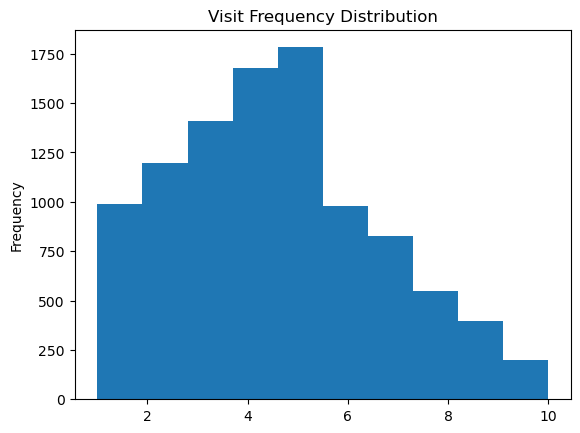

In [168]:
# Analyze visit frequency distribution
print("\nVisit Frequency Distribution:")
print(visit_frequency['visit_count'].describe())

# Identify patterns or trends in visit frequency
visit_frequency['visit_count'].plot(kind='hist', bins=10, title='Visit Frequency Distribution')

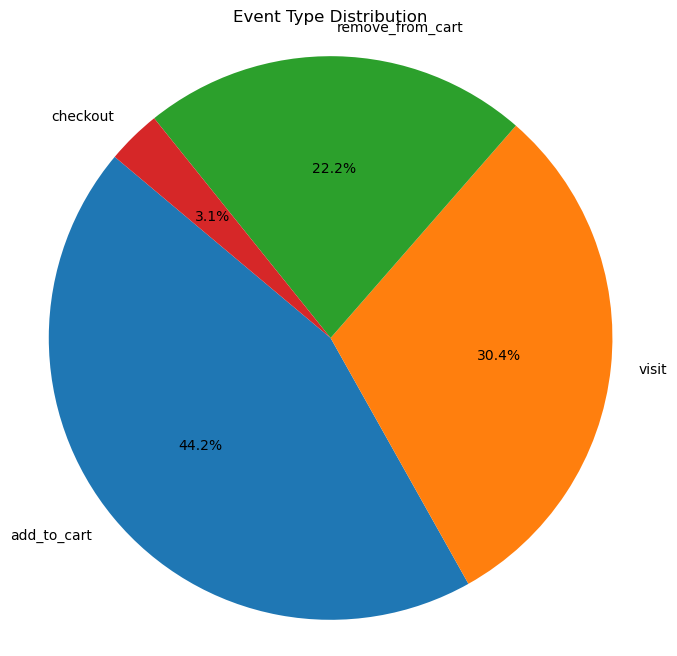

Event Type Distribution (Percentage):

add_to_cart         44.243519
visit               30.447394
remove_from_cart    22.188332
checkout             3.120754
Name: event_type, dtype: float64


In [207]:
# Calculate relative frequencies of each event type
event_type_counts = df['event_type'].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Event Type Distribution')
plt.show()

# Display relative frequencies as a table
print("Event Type Distribution (Percentage):\n")
print(event_type_counts * 100)

In [182]:
#Prefered day of the week for customer engagement
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract day of the week
df['day_of_week'] = df['timestamp'].dt.day_name()

# Count occurrences of each day of the week
day_activity = df['day_of_week'].value_counts()

# Print the result
print(day_activity)

Saturday     133818
Wednesday      3037
Thursday       2969
Tuesday        2673
Friday         1710
Sunday         1509
Monday         1492
Name: day_of_week, dtype: int64


##### Segment customers based on their preferences, geographic location, and purchasing behavior.

In [170]:

# Segment customers based on their purchasing behavior.
# count the number of canceled, failed, and successful orders.
order_counts = merged_df_3['status'].value_counts()

In [171]:
order_counts

failed       12204
success      12123
cancelled    11985
Name: status, dtype: int64

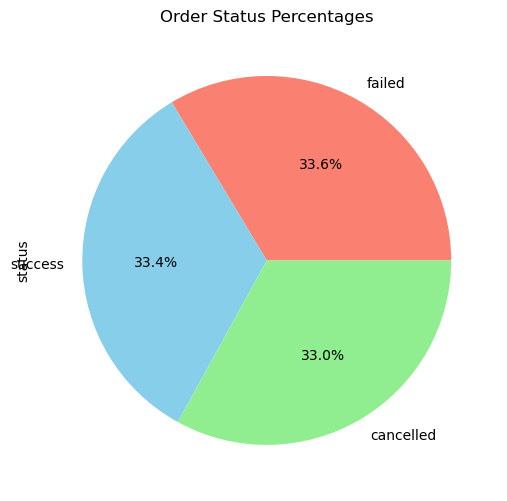

In [212]:
# Calculate percentages
order_percentages = (order_counts / order_counts.sum()) * 100

# Plotting
plt.figure(figsize=(10, 6))


# Plot for order percentages (pie chart)
plt.subplot(1, 2, 2)
order_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'skyblue', 'lightgreen'])
plt.title('Order Status Percentages')

plt.tight_layout()
plt.show()

In [173]:
# 2. Enhance website usability and user experience based on insights gained from customer interactions.
#    Analyze checkout abandonment rates.
checkout_abandonment_rate = len(merged_df_3[merged_df_3['status'] == 'cancelled']) / len(merged_df_3)
checkout_abandonment_rate
                        

0.32263709047836975

In [174]:
# 3. Optimize product offerings and marketing strategies to improve customer satisfaction and retention.
#    Analyze popular products based on successful orders.
popular_products = merged_df_3[merged_df_3['status'] == 'success'].groupby('item_id')['name'].value_counts().sort_values(ascending=False)
popular_products

item_id  name                       
7.0      Apple AirPods Pro              735
11.0     Canon EOS R5 Camera            733
8.0      Sony WH-1000XM4 Headphones     728
6.0      Adidas Ultraboost              727
10.0     Dell XPS 13 Laptop             726
4.0      Microsoft Xbox Series X        722
2.0      Samsung Galaxy S21             721
12.0     Coca-Cola 12-Pack              718
1.0      iPhone 13                      712
3.0      Sony PlayStation 5             707
15.0     Fitbit Charge 4                704
5.0      Nike Air Max 270               702
14.0     Samsung 55-Inch 4K Smart TV    700
13.0     Starbucks Coffee Beans         684
9.0      Nintendo Switch                654
Name: name, dtype: int64

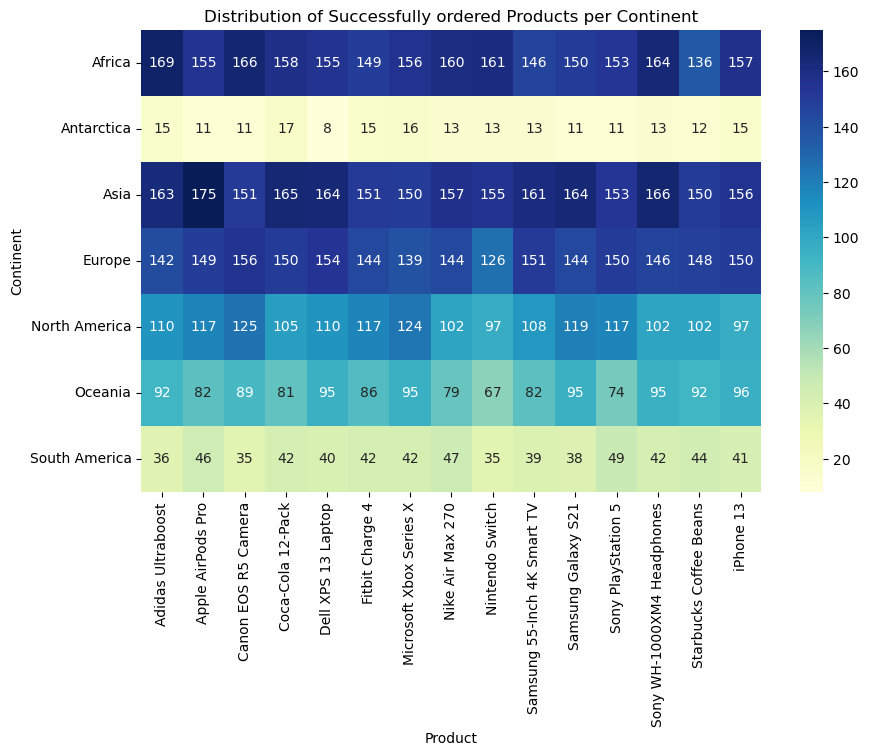

In [180]:
# Segment customers based on their geographic location
# Group by continent and name, count occurrences of each successfully ordered items within each continent
product_distribution = merged_df_3[merged_df_3['status'] == 'success'].groupby(['continent', 'name']).size().unstack(fill_value=0)

# Plot as a row and column table
plt.figure(figsize=(10, 6))
sns.heatmap(product_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Successfully ordered Products per Continent')
plt.xlabel('Product')
plt.ylabel('Continent')
plt.show()

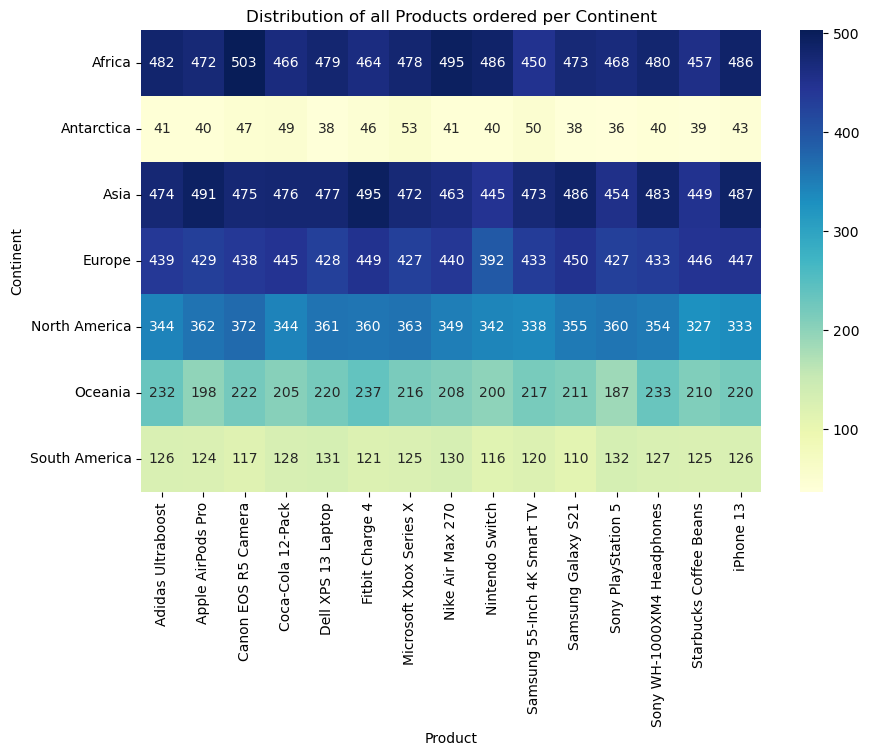

In [181]:
# Group by continent and name, count occurrences of each item within each continent
product_distribution = merged_df_3.groupby(['continent', 'name']).size().unstack(fill_value=0)

# Plot as a row and column table
plt.figure(figsize=(10, 6))
sns.heatmap(product_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of all Products ordered per Continent')
plt.xlabel('Product')
plt.ylabel('Continent')
plt.show()

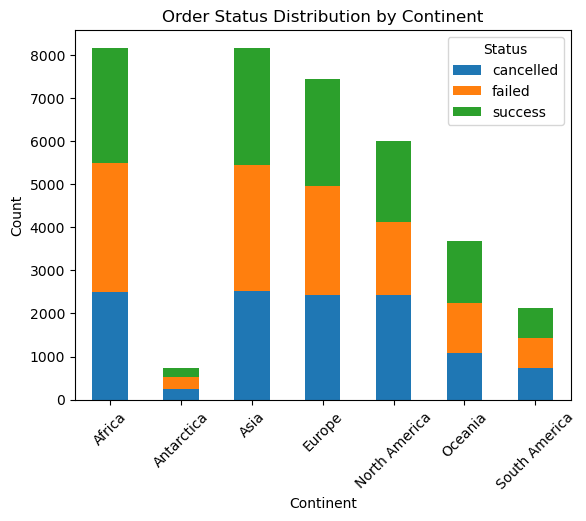

In [176]:
# Group by 'continent' and 'status' columns and count the occurrences
location_order_status = merged_df_3.groupby(['continent', 'status']).size().unstack(fill_value=0)

# Plot the distribution of order statuses for each continent separately
location_order_status.plot(kind='bar', stacked=True)
plt.title('Order Status Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

In [191]:
# Successful orders not captured in line_items datasets
filtered_successful_orders_check = merged_df_3[(merged_df_3['status'] == 'success') &(merged_df_3['line_item_id'].isna() | merged_df_3['item_id'].isna() | merged_df_3['quantity'].isna())]

filtered_successful_orders_check.shape

(1450, 14)

In [192]:
# All orders not captured in line_items datasets

filtered_all_orders_check = merged_df_3[(merged_df_3['order_id'].notnull()) & (merged_df_3['line_item_id'].isnull()) & (merged_df_3['item_id'].isnull()) & (merged_df_3['quantity'].isnull())]

filtered_all_orders_check.shape

(4571, 14)